<a href="https://colab.research.google.com/github/karchanaa/Document-Scanner-Using-OpenCV/blob/main/Document_Scanner_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DOCUMENT SCANNER USING OPENCV

In [ ]:
# Install and import libraries
!pip install opencv-python-headless matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload your image
print("📤 Upload the document image (e.g. the 20% off image)...")
uploaded = files.upload()


📤 Upload the document image (e.g. the 20% off image)...


Saving bill.jpg to bill.jpg


In [ ]:
# Read the uploaded image
for filename in uploaded.keys():
    img_path = filename


In [ ]:
img = cv2.imread(img_path)
original = img.copy()

In [ ]:
# Function to show each image clearly
def show(title, img, cmap=None):
    plt.figure(figsize=(6,6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

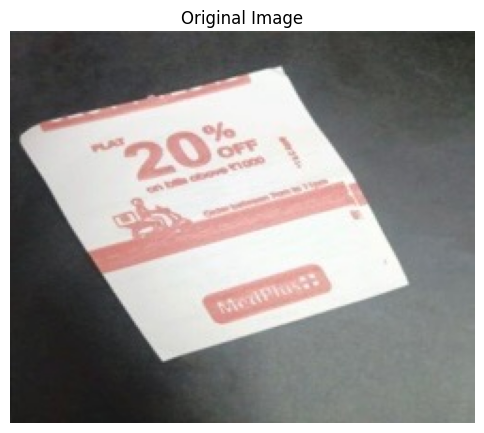

In [ ]:
# Function to show each image clearly
def show(title, img, cmap=None):
    plt.figure(figsize=(6,6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

#  Original Image
show("Original Image", original)

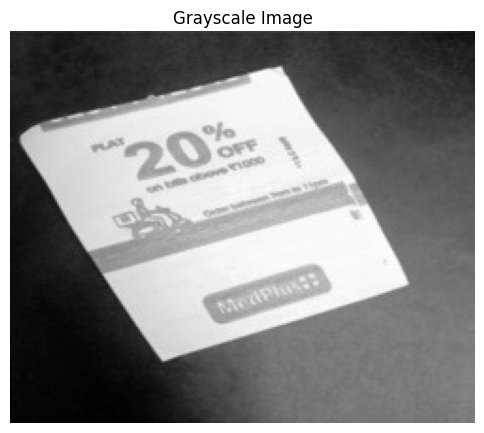

In [ ]:
# 2️⃣ Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show("Grayscale Image", gray)


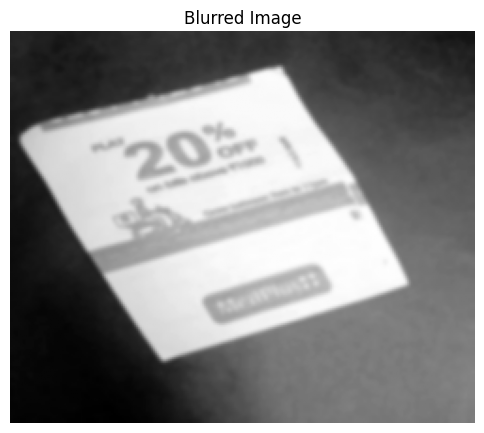

In [ ]:
# 3️⃣ Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
show("Blurred Image", blurred)


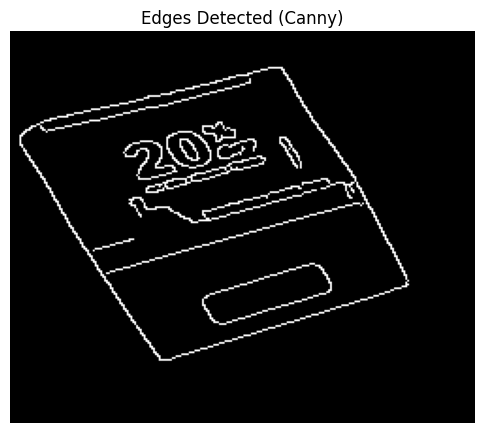

In [ ]:
# 4️⃣ Edge Detection (Canny)
edges = cv2.Canny(blurred, 75, 200)
show("Edges Detected (Canny)", edges)

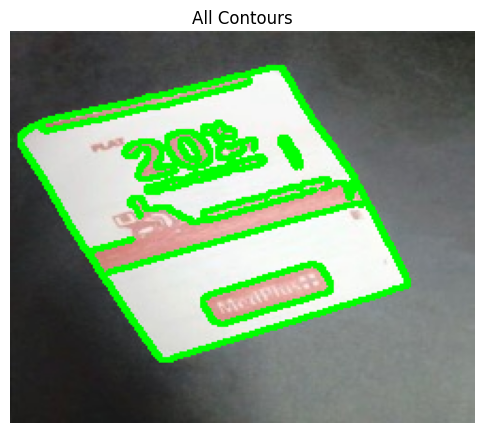

In [ ]:
# 5️⃣ Find All Contours
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img_all = img.copy()
cv2.drawContours(img_all, contours, -1, (0, 255, 0), 2)
show("All Contours", img_all)


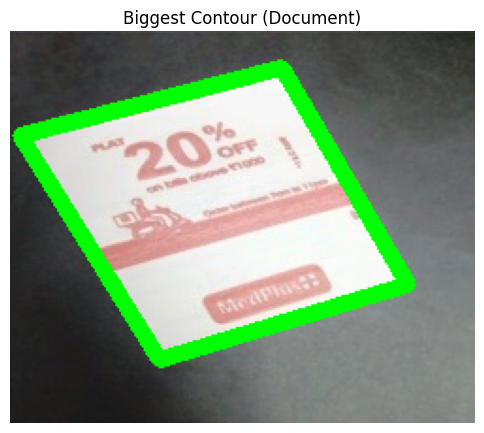

In [ ]:
# 6️⃣ Find the Biggest Contour (Document)
def get_biggest_contour(contours):
    biggest = None
    max_area = 0
    for c in contours:
        area = cv2.contourArea(c)
        if area > 1000:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            if len(approx) == 4 and area > max_area:
                biggest = approx
                max_area = area
    return biggest

biggest = get_biggest_contour(contours)

img_big = img.copy()
if biggest is not None:
    cv2.drawContours(img_big, [biggest], -1, (0, 255, 0), 8)
show("Biggest Contour (Document)", img_big)


In [ ]:
# 7️⃣ Reorder Points for Warping
def reorder(points):
    points = points.reshape((4, 2))
    new_points = np.zeros((4, 2), dtype=np.float32)
    add = points.sum(1)
    new_points[0] = points[np.argmin(add)]
    new_points[2] = points[np.argmax(add)]
    diff = np.diff(points, axis=1)
    new_points[1] = points[np.argmin(diff)]
    new_points[3] = points[np.argmax(diff)]
    return new_points

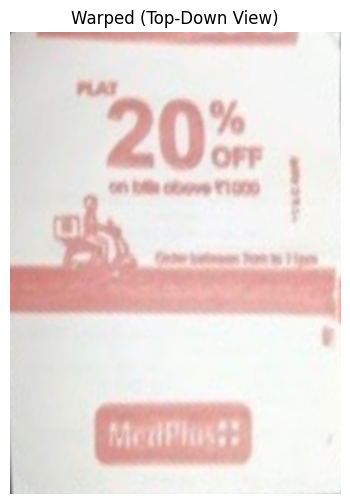

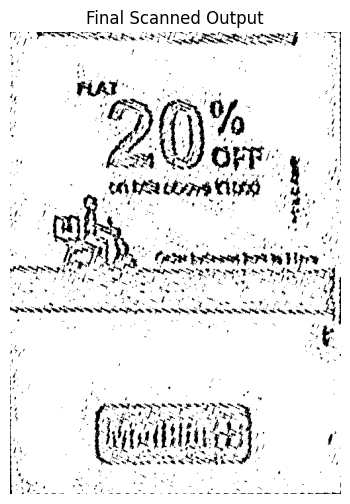

In [ ]:
# 8️⃣ Warp Perspective + Adaptive Threshold
if biggest is not None:
    biggest = reorder(biggest)
    pts1 = np.float32(biggest)
    width, height = 500, 700
    pts2 = np.float32([[0, 0], [width, 0], [width, height], [0, height]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    warped = cv2.warpPerspective(original, matrix, (width, height))
    show("Warped (Top-Down View)", warped)

    # Final Scanned Output
    warped_gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    final = cv2.adaptiveThreshold(warped_gray, 255,
                                  cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY, 11, 2)
    show("Final Scanned Output", final)
else:
    print("⚠️ Document contour not detected properly. Try clearer or higher contrast image.")

In [ ]:
#Display Results
def show_images(images, titles, cols=4):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(18, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()


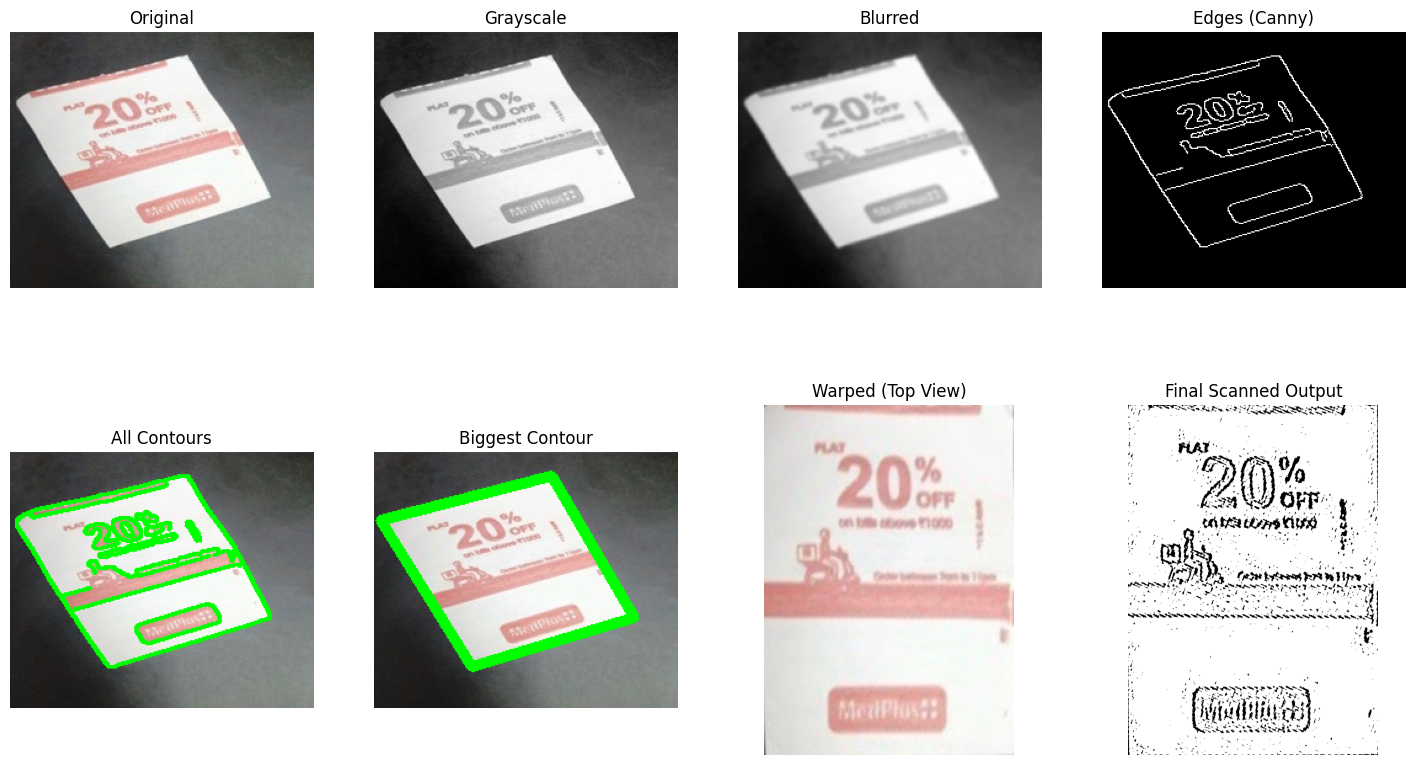

In [ ]:
titles = [
    "Original",
    "Grayscale",
    "Blurred",
    "Edges (Canny)",
    "All Contours",
    "Biggest Contour",
    "Warped (Top View)",
    "Final Scanned Output"
]

images = [
    original,
    gray,
    blurred,
    edges,
    img_all,
    img_big,
    warped,
    final
]

show_images(images, titles)